In [1]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

In [5]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [6]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

C:\Users\ggkax\AppData\Local\Temp\ipykernel_18240\2725581666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


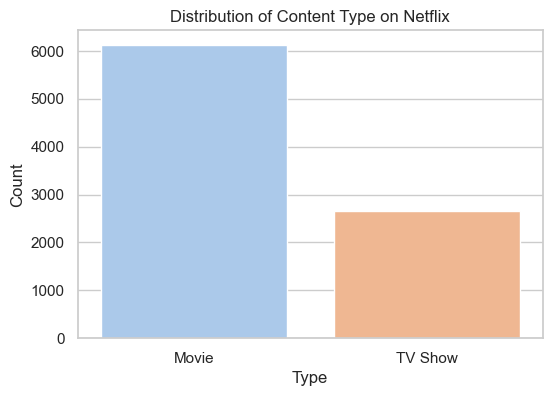

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [9]:
df['year_added'] = df['date_added'].dt.year

C:\Users\ggkax\AppData\Local\Temp\ipykernel_18240\3487854955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='rocket', order=sorted(df['year_added'].dropna().unique()))


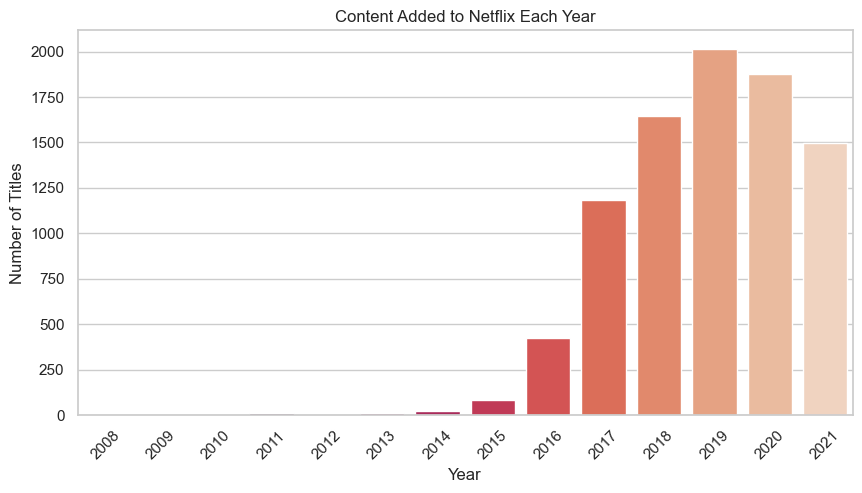

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', palette='rocket', order=sorted(df['year_added'].dropna().unique()))
plt.xticks(rotation=45)
plt.title('Content Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

In [11]:
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])

C:\Users\ggkax\AppData\Local\Temp\ipykernel_18240\1060189102.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


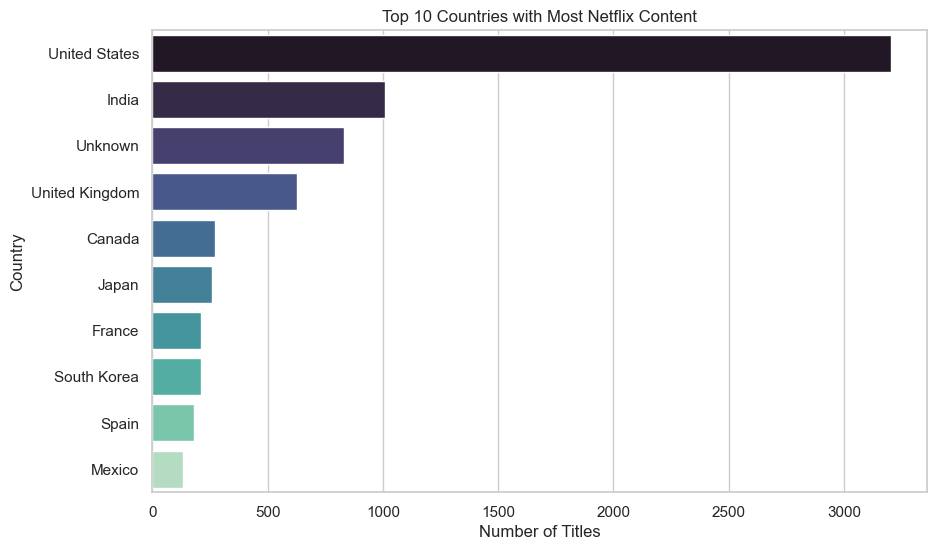

In [12]:
top_countries = df['main_country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

C:\Users\ggkax\AppData\Local\Temp\ipykernel_18240\1490895634.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=genres, palette='coolwarm')


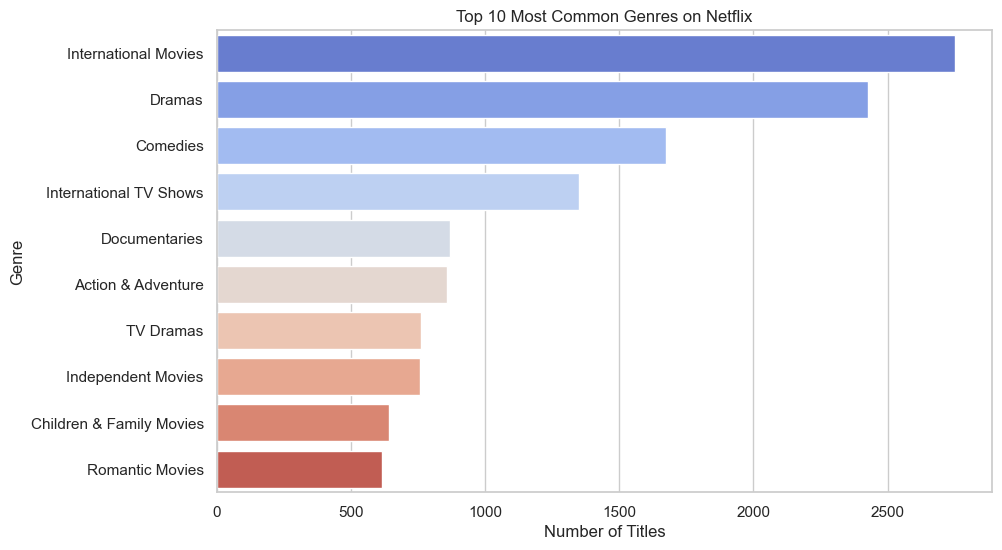

In [13]:
from collections import Counter

genre_counter = Counter()
df['listed_in'].apply(lambda x: genre_counter.update([i.strip() for i in x.split(',')]))

top_genres = genre_counter.most_common(10)
genres, counts = zip(*top_genres)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=genres, palette='coolwarm')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [14]:
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(int)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)').astype(str)

In [15]:
movies_df = df[df['type'] == 'Movie']
shows_df = df[df['type'] == 'TV Show']

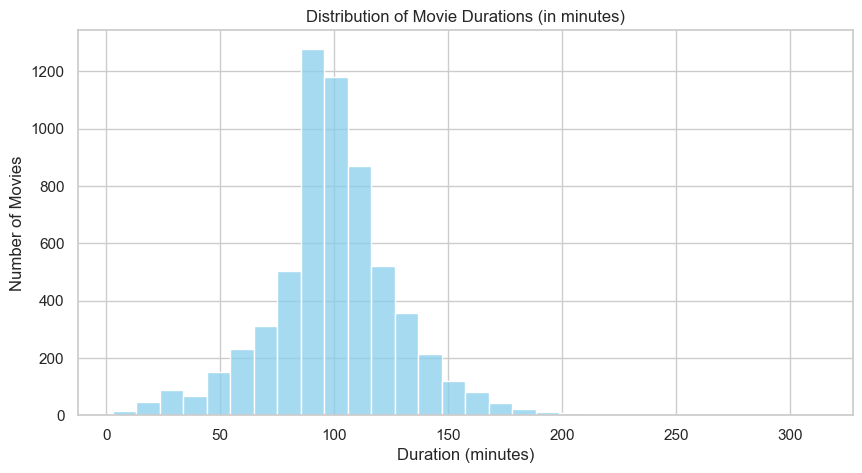

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data=movies_df, x='duration_int', bins=30, color='skyblue')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

C:\Users\ggkax\AppData\Local\Temp\ipykernel_18240\3313355898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=shows_df, x='duration_int', palette='Set2', order=sorted(shows_df['duration_int'].unique()))


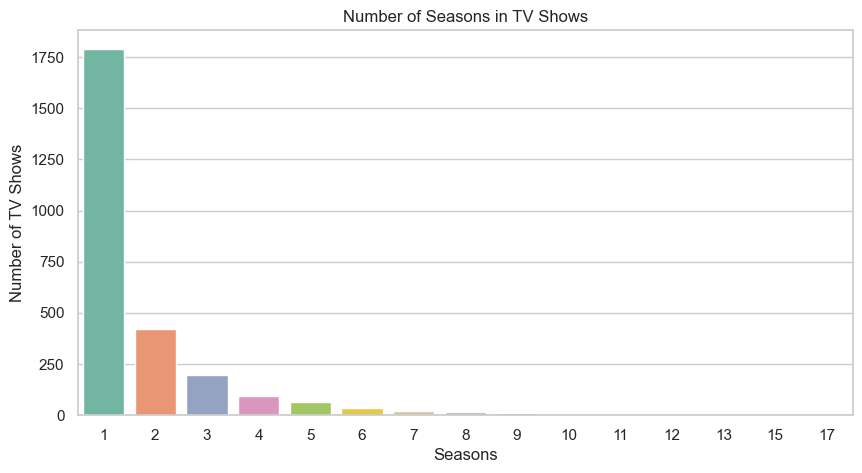

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=shows_df, x='duration_int', palette='Set2', order=sorted(shows_df['duration_int'].unique()))
plt.title('Number of Seasons in TV Shows')
plt.xlabel('Seasons')
plt.ylabel('Number of TV Shows')
plt.show()